In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import igraph as ig
import numpy as np
import src.analysis.robustness_testing as rt
import src.analysis.community_aware_centrality as cac

import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
g = ig.Graph()
g.add_vertices(['1','2','3'])
g.add_edges([('1','2'), ('2','2'), ('2', '3')])
g.es['weight'] = [2, 3, 2]
print(g.degree(), g.strength(weights='weight'))

part = ig.VertexClustering(g, membership=[0, 1, 1])

[1, 4, 1] [2.0, 10.0, 2.0]


In [8]:
centralities = [cac.modularity_vitality,
                cac.absolute_modularity_vitality,
                cac.community_hub_bridge,
                cac.degree,
                cac.weighted_modular_centrality_degree,
                cac.adjusted_modular_centrality_degree,
                cac.masuda]

In [23]:
for centrality_func in centralities:
    rho, sigma, rho_e = rt.initial_attack(g, part, centrality_func)
    print(f'finished {centrality_func.__name__}')

finished modularity_vitality
finished absolute_modularity_vitality
finished community_hub_bridge
finished degree
finished weighted_modular_centrality_degree
finished adjusted_modular_centrality_degree
finished masuda


In [24]:
net_name = 'Test'

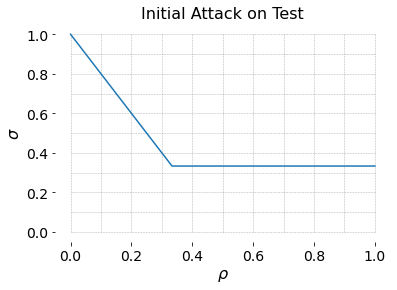

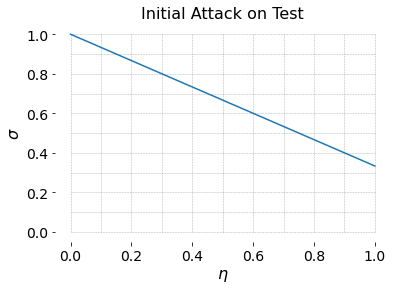

In [25]:
plt.figure(0)
ax1 = plt.subplot(111)
plt.figure(1)
ax2 = plt.subplot(111)    

rho[-1] = 1
# name_str = renaming[func.__name__.split('_attack')[0]]
name_str = centrality_func.__name__
plt.figure(0)
plt.plot(rho, sigma, label=name_str)

plt.figure(1)
plt.plot(rho_e, sigma, label=name_str)


plt.figure(0)
plt.title('Initial Attack on ' + net_name, fontsize=16)
plt.ylabel(r'$\sigma$', fontsize=16)
plt.xlabel(r'$\rho$', fontsize=16)
ax1.spines["top"].set_visible(False)    
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)    
ax1.spines["left"].set_visible(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    plt.hlines(i, xmin=0, xmax=1,linestyles='--', lw=0.5, color='black', alpha=0.3)
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    plt.vlines(i, ymin=0, ymax=1,linestyles='--', lw=0.5, color='black', alpha=0.3)

    
# plt.savefig(fig_dir + 'election_week_rho.eps', bbox_inches='tight')

plt.figure(1)
# plt.legend(fontsize=14)
# plt.legend(loc ='center left',bbox_to_anchor=(1,0.5), fontsize=14)
plt.title('Initial Attack on ' + net_name, fontsize=16)
plt.ylabel(r'$\sigma$', fontsize=16)
plt.xlabel(r'$\eta$', fontsize=16)

ax2.spines["top"].set_visible(False)    
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)    
ax2.spines["left"].set_visible(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    plt.hlines(i, xmin=0, xmax=1,linestyles='--', lw=0.5, color='black', alpha=0.3)
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    plt.vlines(i, ymin=0, ymax=1,linestyles='--', lw=0.5, color='black', alpha=0.3)
# plt.savefig(fig_dir + 'election_week_eta.eps', bbox_inches='tight')